# Import required libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Load the dataset

In [137]:
df=pd.read_csv('indian_liver_patient.csv')

# Get top 5 records

In [138]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Domain knowledge

In [139]:
#Age->age of patient
#Gender->Gender of patient
#Total_Bilirubin->total amount of a substance called bilirubin
#Direct_Bilirubin->
#Alkaline_Phosphotase->count of Alkaline_Phosphotase
#Alamine_Aminotransferase->count of Alamine_Aminotransferase
#Aspartate_Aminotransferase->count of Aspartate_Aminotransferase
#Total_Protiens->count of Total_Protiens
#Albumin->count of Albumin presence
#Albumin_and_Globulin_Ratio->Ration of Albumin count to Globulin count
#Dataset->field used to split the data into two sets (patient with liver disease, or no disease)

# Check number of rows and columns of dataset

In [140]:
df.shape

(583, 11)

# Data types of each column

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Check for any null values

In [142]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

# Sum of null values in column Albumin_and_Globulin_Ratio

In [143]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [144]:
#there are 4 null values present in Albumin_and_Globulin_Ratio column

# Replace null values

In [145]:
#since Albumin_and_Globulin_Ratio is numerical column replace it with mean or median

In [146]:
df.describe()#to view mean /median

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Replacing null values of Albumin_and_Globulin_Ratio with mean

In [147]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [148]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [149]:
#null values replaced with mean of Albumin_and_Globulin_Ratio column

# Categorical columns

In [150]:
#only gender is categorical column

# Categories in gender

In [151]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

# Counts of the categories in gender

In [152]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

# Visualization

## Univariate analysis

In [153]:
#analysing single columns

In [154]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

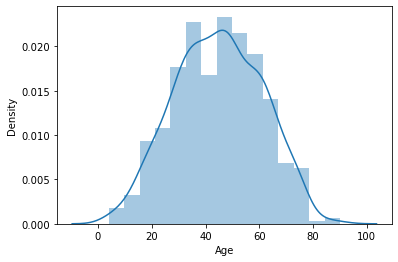

In [155]:
#age using distribution plot->used for checking assymtery of curve
sns.distplot(df.Age)

In [156]:
#age using box plot->used for checking outliers

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

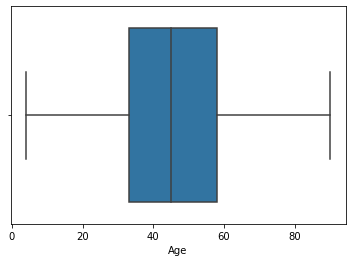

In [157]:
sns.boxplot(df.Age)

In [158]:
#no outliers so we can continue

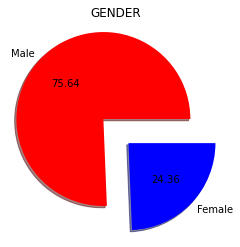

In [159]:
#gender using pie chart
plt.pie(df['Gender'].value_counts(),[0.2,0.2],labels=['Male','Female'],colors=['red','blue'],autopct="%.2f",shadow=True)
plt.title('GENDER')
plt.show()

In [160]:
#Since it is a categorial column we have to encode it so that machine can understand it

# Encoding of categorial columns->Label encoding vs one hot encoding

In [161]:
#Since gender is only categorical column->
#Male and female go for label encoding to maintain accuracy of data as well as prediction 

In [162]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Label encoding

### importing required package

In [163]:
#Female->0 and Male->1

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
le=LabelEncoder()

In [166]:
df['Gender']=le.fit_transform(df['Gender'])

In [167]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [168]:
#encoding done

In [169]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [170]:
#  using box plot->used for checking outliers

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direct_Bilirubin'>

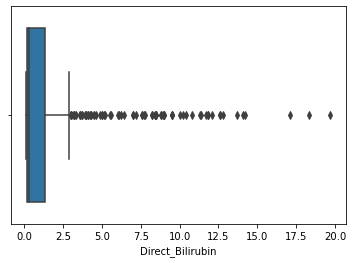

In [171]:
sns.boxplot(df['Direct_Bilirubin'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Direct_Bilirubin', ylabel='Density'>

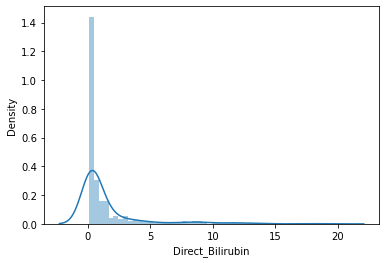

In [172]:
sns.distplot(df['Direct_Bilirubin'])

In [173]:
#right skewed

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bilirubin'>

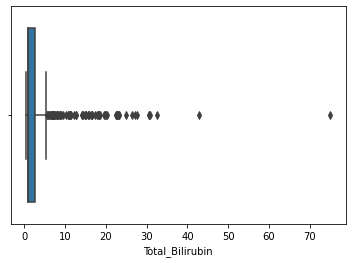

In [174]:
sns.boxplot(df['Total_Bilirubin'])


C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

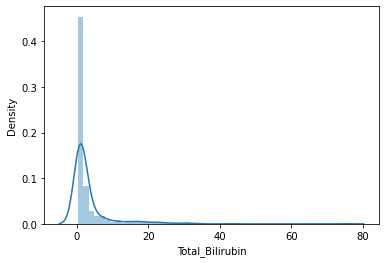

In [175]:
sns.distplot(df['Total_Bilirubin'])

In [176]:
#right skewed

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alkaline_Phosphotase'>

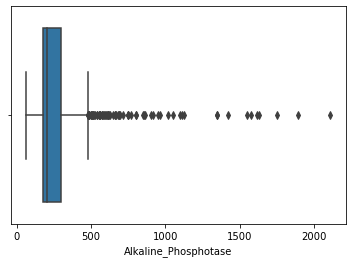

In [177]:
sns.boxplot(df['Alkaline_Phosphotase'])

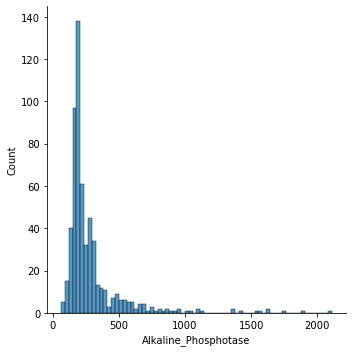

In [178]:
sns.displot(df['Alkaline_Phosphotase'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

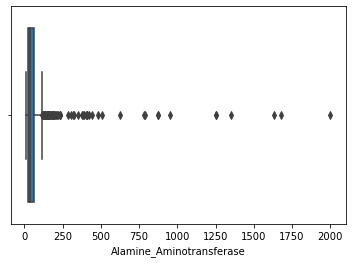

In [179]:
sns.boxplot(df['Alamine_Aminotransferase'])

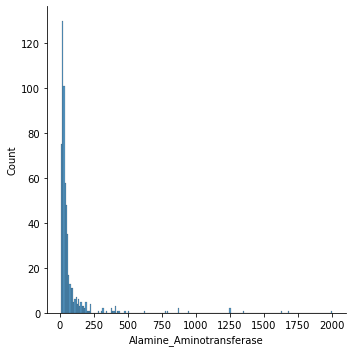

In [180]:
sns.displot(df['Alamine_Aminotransferase'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

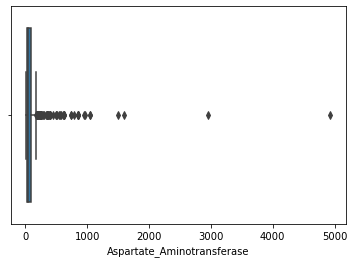

In [181]:
sns.boxplot(df['Aspartate_Aminotransferase'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Aspartate_Aminotransferase', ylabel='Density'>

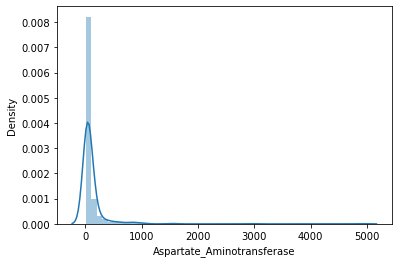

In [182]:
sns.distplot(df['Aspartate_Aminotransferase'])

In [183]:
#right skewed

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Protiens'>

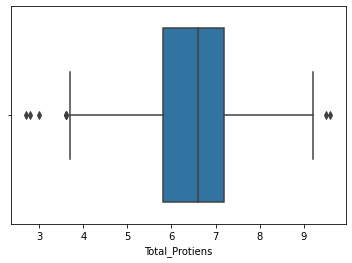

In [184]:
sns.boxplot(df['Total_Protiens'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Protiens', ylabel='Density'>

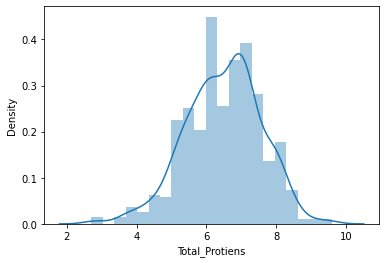

In [185]:
sns.distplot(df['Total_Protiens'])

In [186]:
#left skewed

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin'>

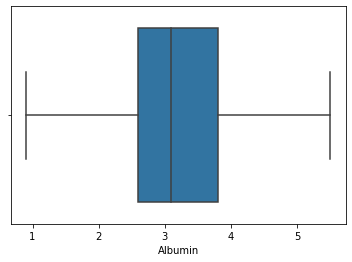

In [187]:
sns.boxplot(df['Albumin'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Albumin', ylabel='Density'>

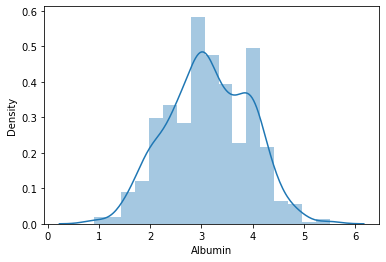

In [188]:
sns.distplot(df['Albumin'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

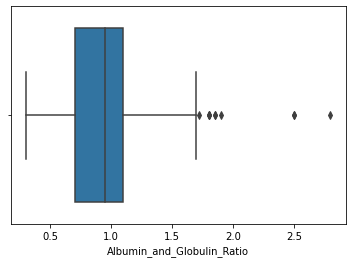

In [189]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

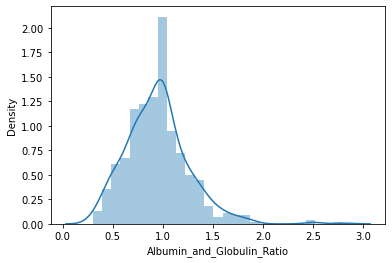

In [190]:
sns.distplot(df['Albumin_and_Globulin_Ratio'])

In [191]:
#right skewed

## BIVARIATE ANALYSIS 

In [192]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Gender'>

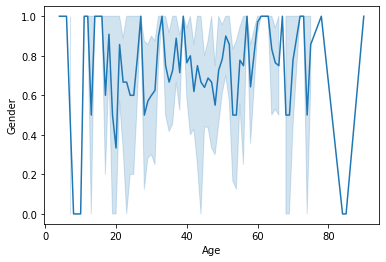

In [193]:
sns.lineplot(df.Age,df.Gender)

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Gender'>

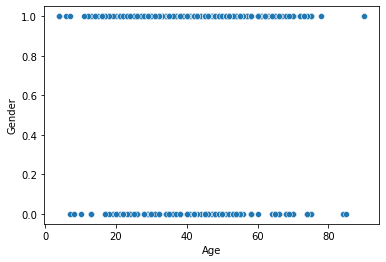

In [194]:
sns.scatterplot(df.Age,df.Gender)

Text(0, 0.5, 'Alamine_Aminotransferase')

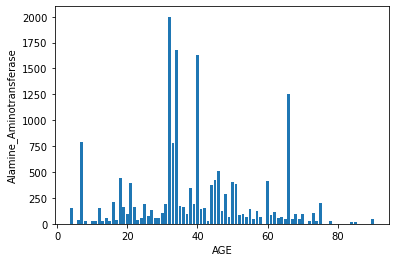

In [195]:
plt.bar(df.Age,df.Alamine_Aminotransferase)
plt.xlabel('AGE')
plt.ylabel('Alamine_Aminotransferase')

Text(0, 0.5, 'Albumin')

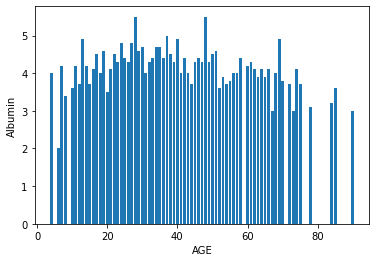

In [196]:
plt.bar(df.Age,df.Albumin)
plt.xlabel('AGE')
plt.ylabel('Albumin')

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

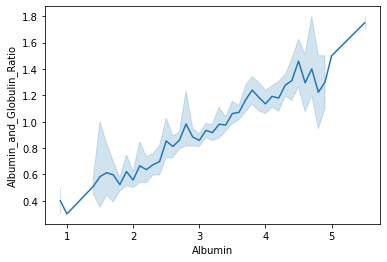

In [197]:
sns.lineplot(df.Albumin,df.Albumin_and_Globulin_Ratio)


## MULTI VARIATE ANALYSIS

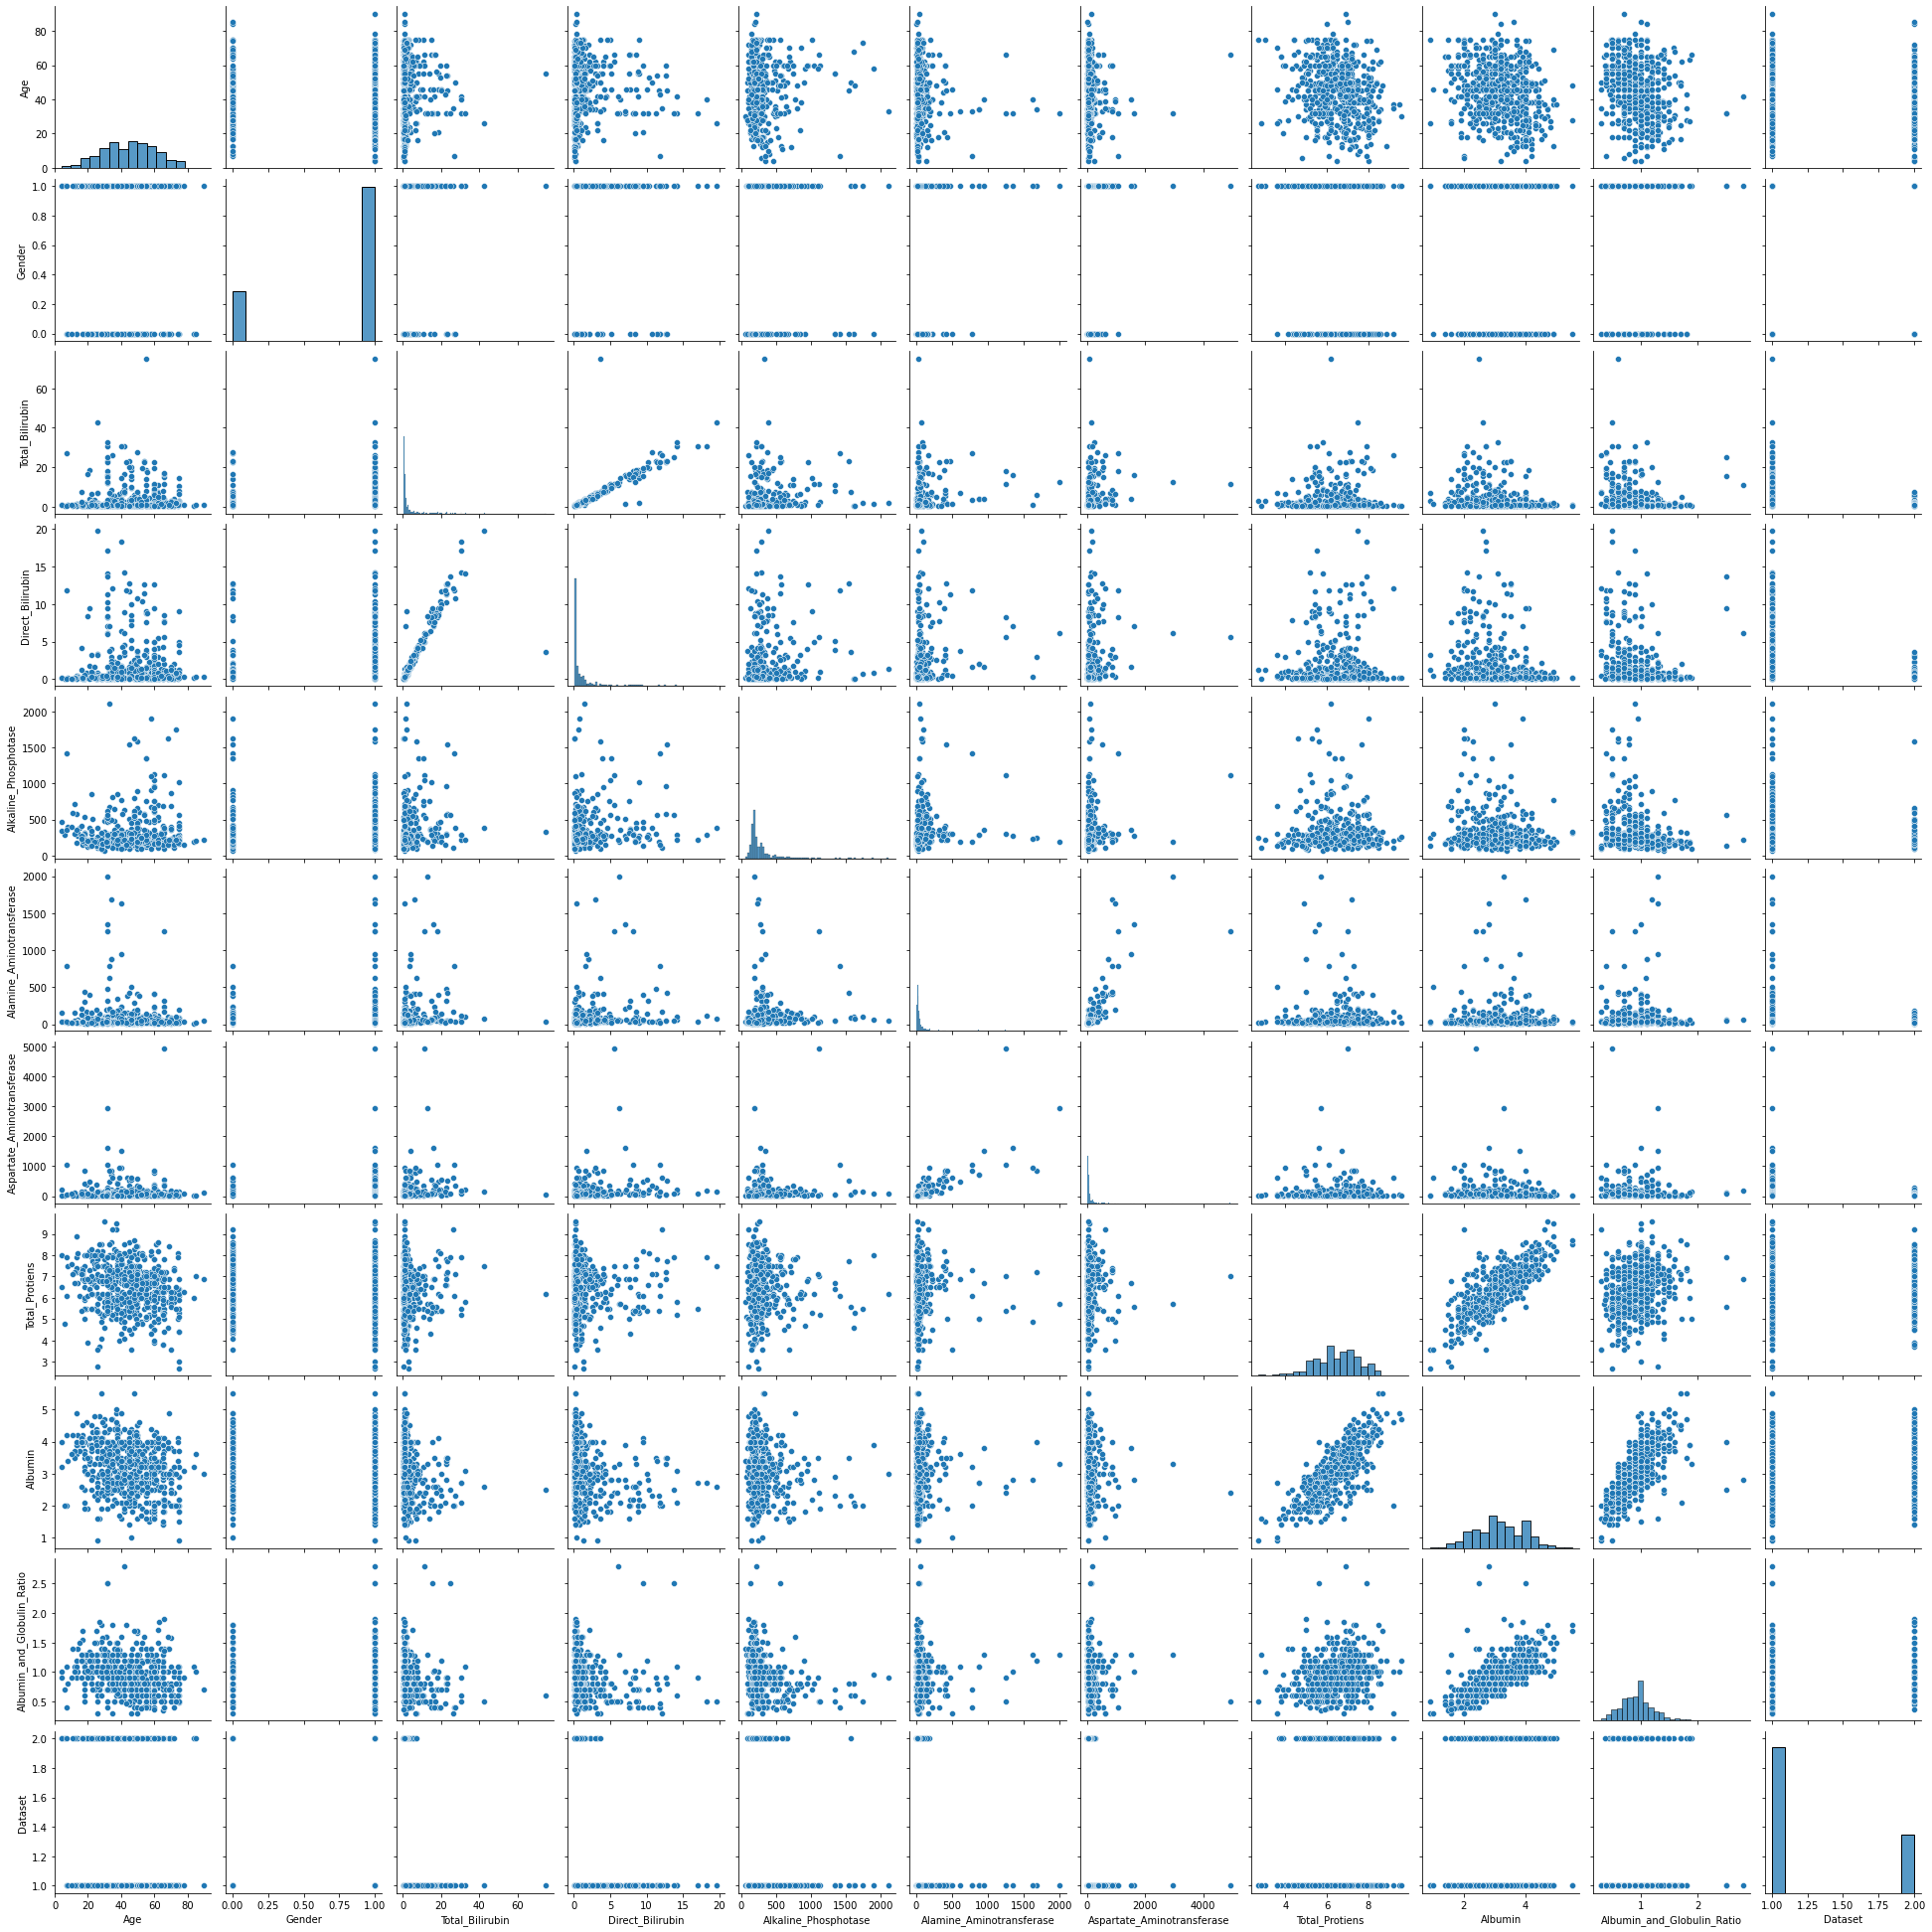

In [198]:
sns.pairplot(df)

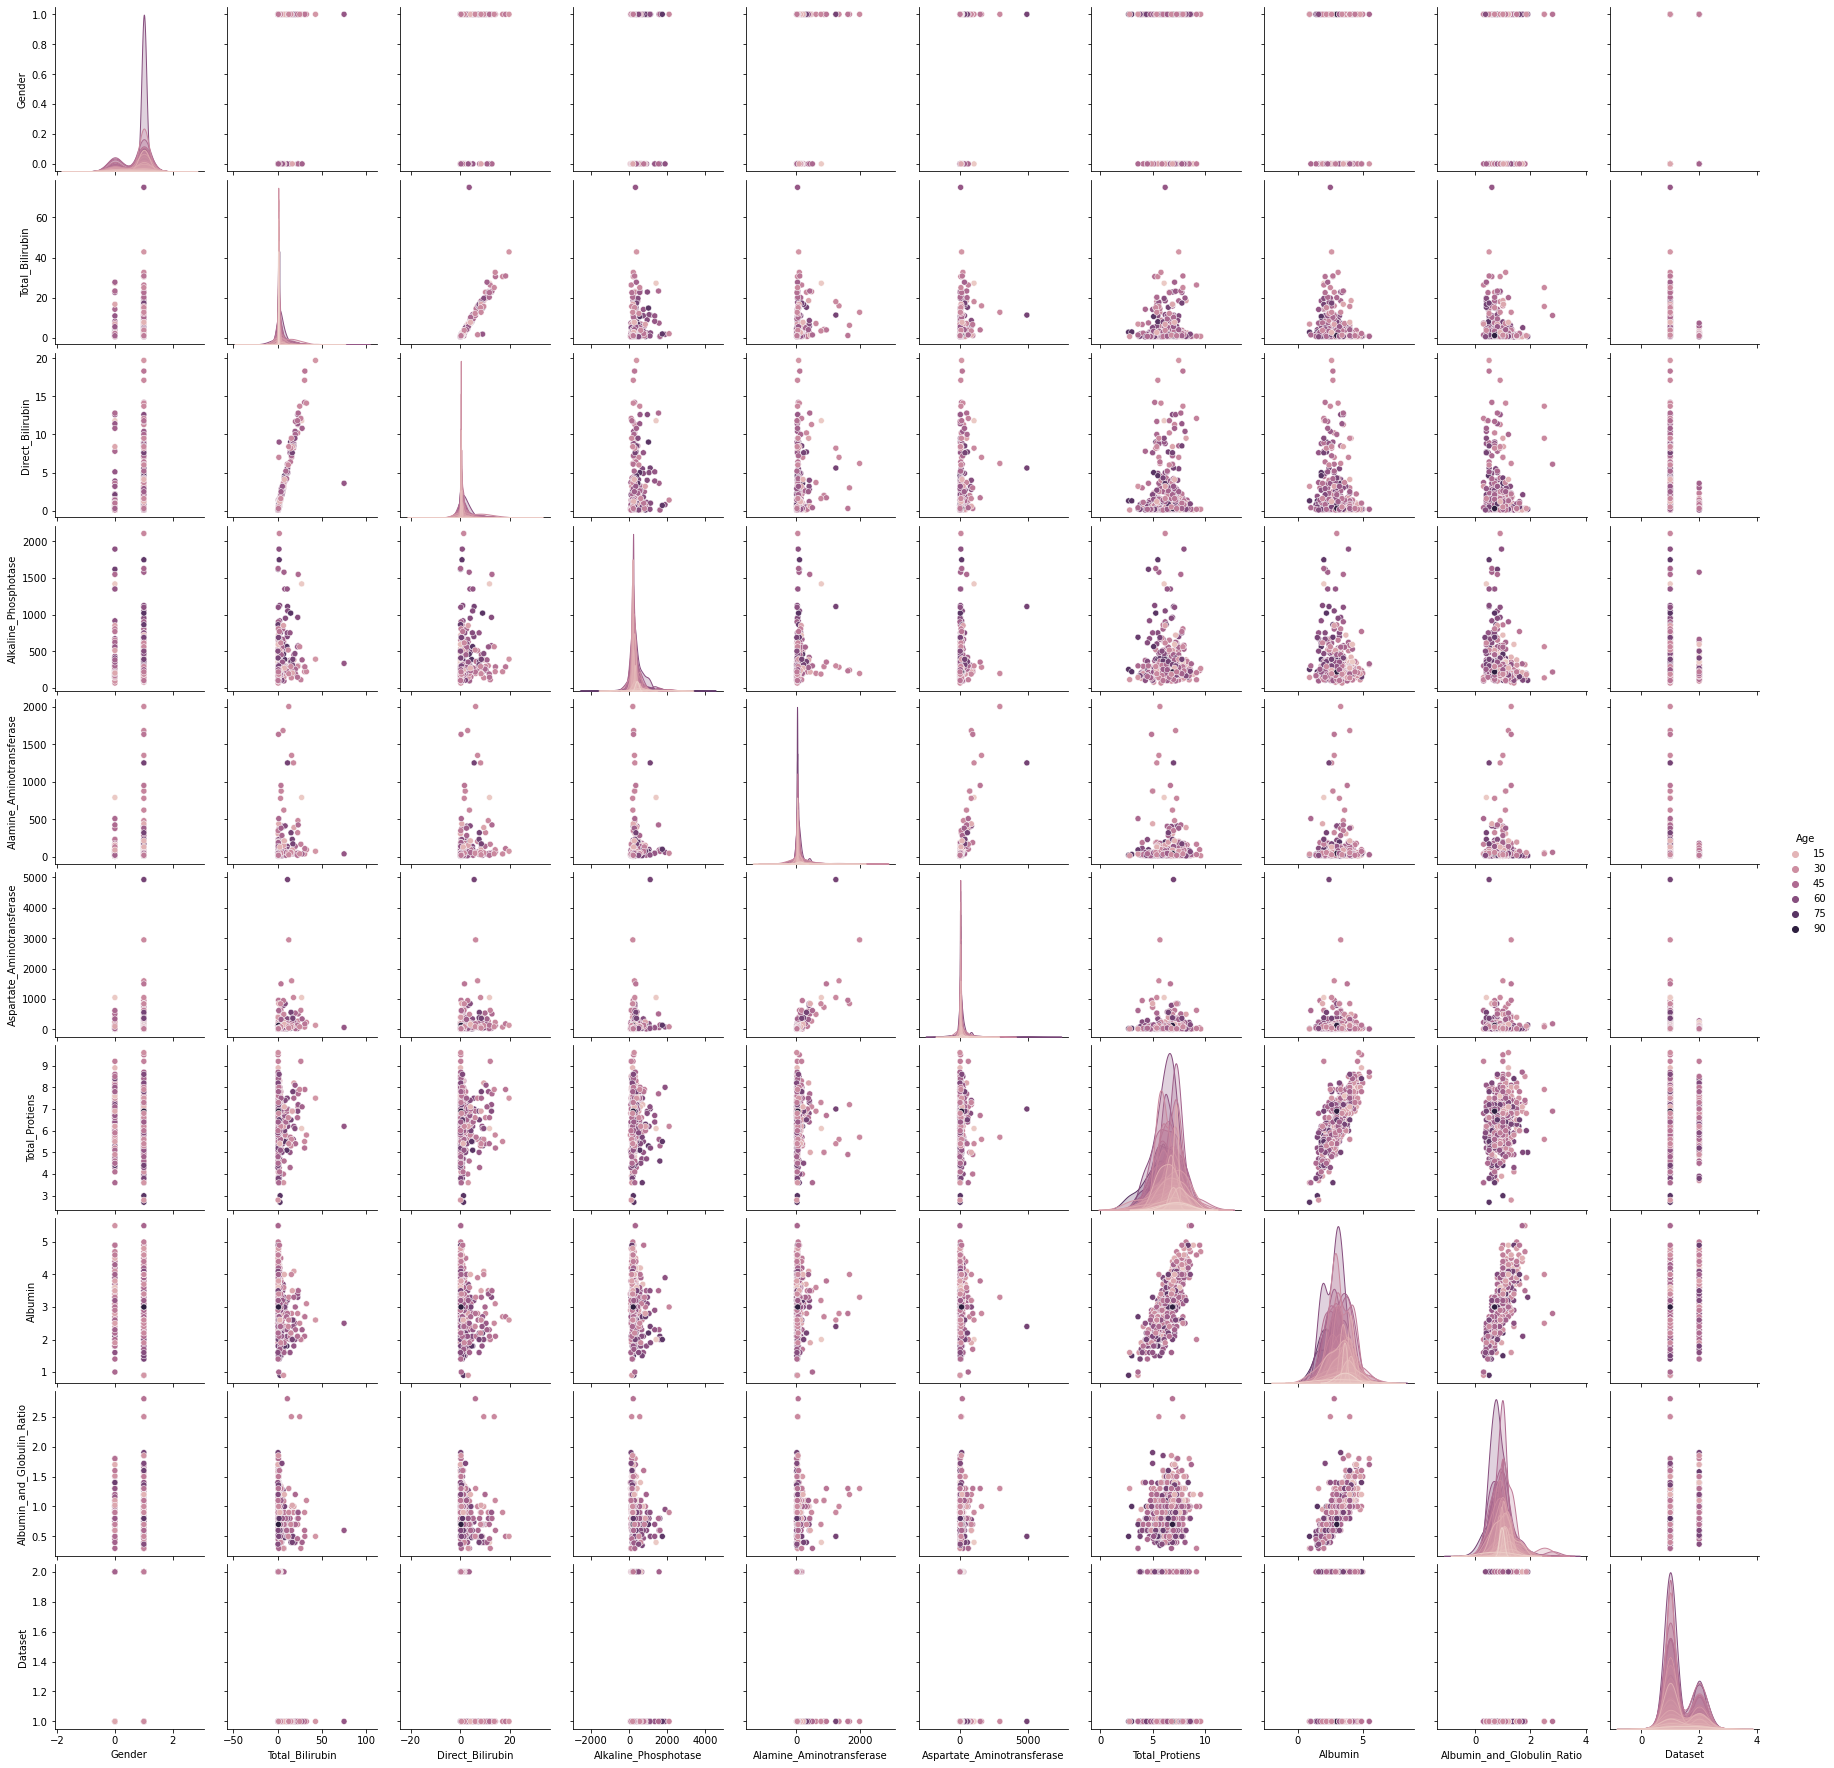

In [199]:
sns.pairplot(df,hue='Age')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>],
       [<AxesSubplot:title={'center':'Direct_Bilirubin'}>,
        <AxesSubplot:title={'center':'Alkaline_Phosphotase'}>,
        <AxesSubplot:title={'center':'Alamine_Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Total_Protiens'}>,
        <AxesSubplot:title={'center':'Albumin'}>],
       [<AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>,
        <AxesSubplot:title={'center':'Dataset'}>, <AxesSubplot:>]],
      dtype=object)

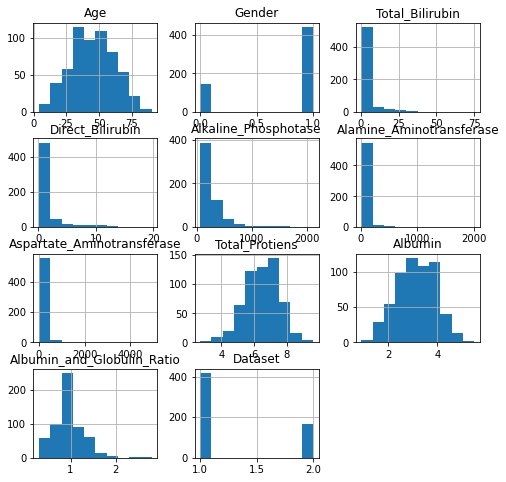

In [200]:
df.hist(figsize=(8,8))

<AxesSubplot:>

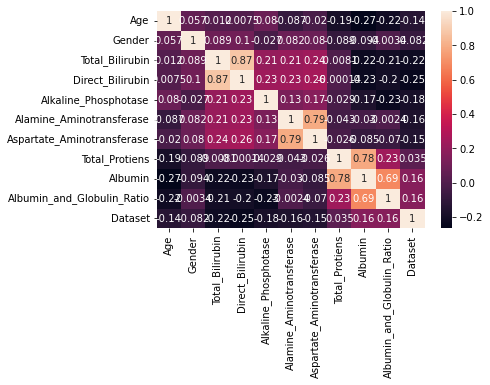

In [201]:
sns.heatmap(df.corr(),annot=True)

# Perform descriptive statistics on the dataset.

In [202]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [203]:
df.var()

Age                             262.110702
Gender                            0.184559
Total_Bilirubin                  38.558160
Direct_Bilirubin                  7.887659
Alkaline_Phosphotase          59018.866587
Alamine_Aminotransferase      33350.194438
Aspartate_Aminotransferase    83473.916429
Total_Protiens                    1.178205
Albumin                           0.632850
Albumin_and_Globulin_Ratio        0.101437
Dataset                           0.204747
dtype: float64

In [204]:
df.std()

Age                            16.189833
Gender                          0.429603
Total_Bilirubin                 6.209522
Direct_Bilirubin                2.808498
Alkaline_Phosphotase          242.937989
Alamine_Aminotransferase      182.620356
Aspartate_Aminotransferase    288.918529
Total_Protiens                  1.085451
Albumin                         0.795519
Albumin_and_Globulin_Ratio      0.318492
Dataset                         0.452490
dtype: float64

In [205]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [206]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [207]:
df.dtypes

Age                             int64
Gender                          int32
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

# Find the outliers and replace them outliers

In [208]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

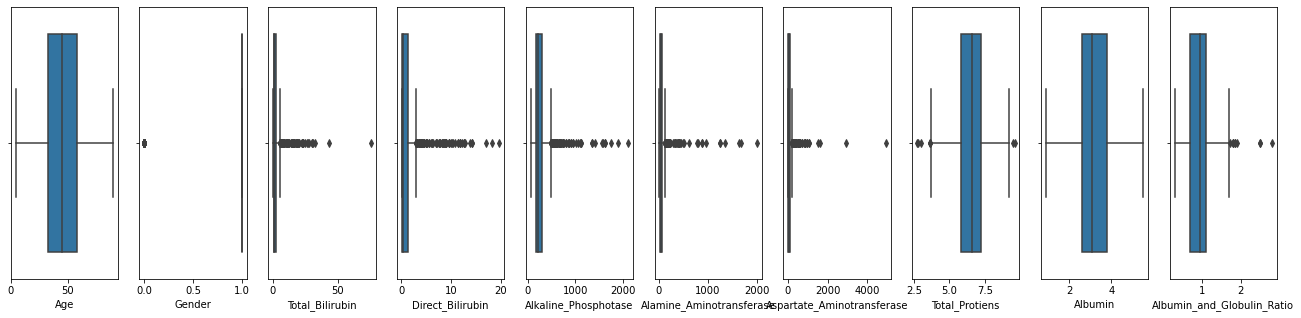

In [209]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 11, 1)
sns.boxplot(x=df['Age'])

plt.subplot(1, 11, 2)
sns.boxplot(x=df['Gender'])

plt.subplot(1, 11, 3)
sns.boxplot(x=df['Total_Bilirubin'])

plt.subplot(1, 11, 4)
sns.boxplot(x=df['Direct_Bilirubin'])

plt.subplot(1, 11, 5)
sns.boxplot(x=df['Alkaline_Phosphotase'])

plt.subplot(1, 11, 6)
sns.boxplot(x=df['Alamine_Aminotransferase'])

plt.subplot(1, 11, 7)
sns.boxplot(x=df['Aspartate_Aminotransferase'])

plt.subplot(1, 11, 8)
sns.boxplot(x=df['Total_Protiens'])

plt.subplot(1, 11, 9)
sns.boxplot(x=df['Albumin'])

plt.subplot(1, 11, 10)
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'])

In [210]:
#Age has no outliers

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender'>

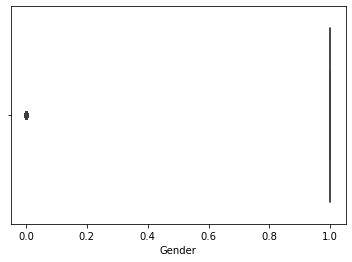

In [211]:
sns.boxplot(df['Gender'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender'>

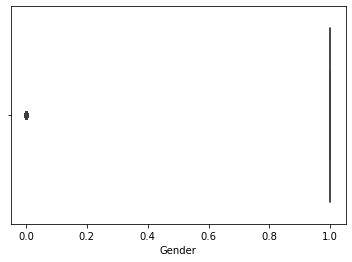

In [212]:
sns.boxplot(df['Gender'])

In [213]:
df['Gender'].mean()

0.7564322469982847

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bilirubin'>

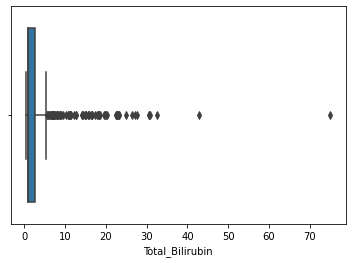

In [214]:
sns.boxplot(df['Total_Bilirubin'])

In [215]:
#since many outilers better to replace them
from scipy import stats

In [216]:
for i in range(1,3):
    q1=df.Total_Bilirubin.quantile(0.25)
    q3=df.Total_Bilirubin.quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df=df[df['Total_Bilirubin']<upper]


C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bilirubin'>

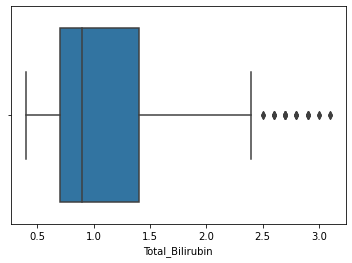

In [217]:
sns.boxplot(df['Total_Bilirubin'])

In [218]:
for i in range(1,15):
    
    Total_Bilirubin_zscore=stats.zscore(df['Total_Bilirubin'])
    df=df[np.abs(Total_Bilirubin_zscore)<=3]
    

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bilirubin'>

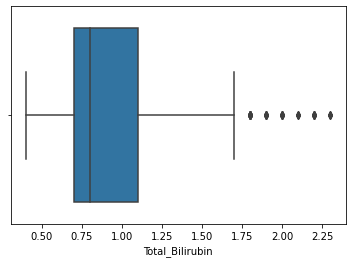

In [219]:
sns.boxplot(df['Total_Bilirubin'])

In [220]:
df.shape

(427, 11)

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direct_Bilirubin'>

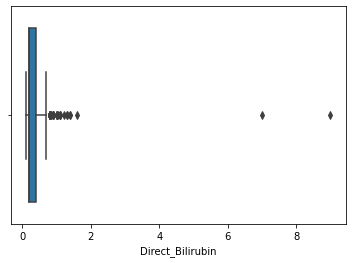

In [221]:
sns.boxplot(df['Direct_Bilirubin'])

In [222]:
for i in range(1,2):
    q1=df.Direct_Bilirubin.quantile(0.25)
    q3=df.Direct_Bilirubin.quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df=df[df['Direct_Bilirubin']<upper]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direct_Bilirubin'>

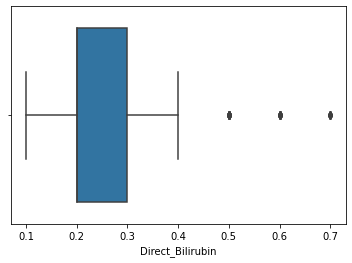

In [223]:
sns.boxplot(df['Direct_Bilirubin'])

In [224]:
df.shape

(376, 11)

In [225]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.0,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.1,1


C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alkaline_Phosphotase'>

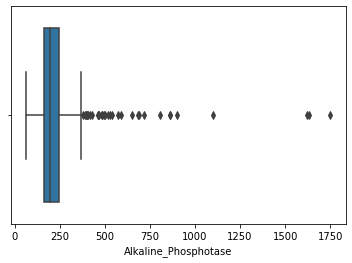

In [226]:
sns.boxplot(df['Alkaline_Phosphotase'])

In [227]:
for i in range(1,6):
    q1=df.Alkaline_Phosphotase.quantile(0.25)
    q3=df.Alkaline_Phosphotase.quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df=df[df['Alkaline_Phosphotase']<upper]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alkaline_Phosphotase'>

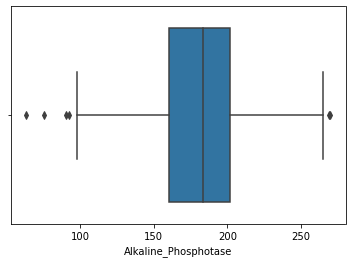

In [228]:
sns.boxplot(df['Alkaline_Phosphotase'])

In [229]:
for i in range(1,8):
    
    Alkaline_Phosphotase_z=stats.zscore(df['Alkaline_Phosphotase'])
    df=df[np.abs(Alkaline_Phosphotase_z)<=3]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alkaline_Phosphotase'>

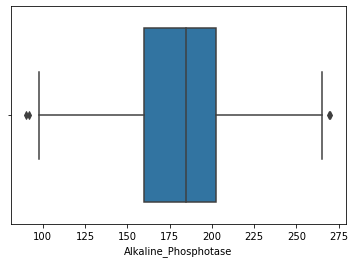

In [230]:
sns.boxplot(df['Alkaline_Phosphotase'])

In [231]:
df.shape


(292, 11)

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

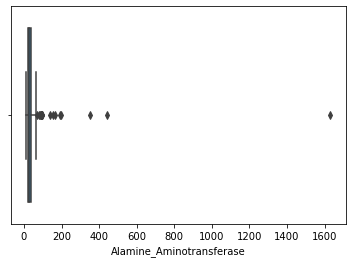

In [232]:
sns.boxplot(df['Alamine_Aminotransferase'])

In [233]:
for i in range(1,3):
    q1=df.Alamine_Aminotransferase.quantile(0.25)
    q3=df.Alamine_Aminotransferase.quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df=df[df['Alamine_Aminotransferase']<upper]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

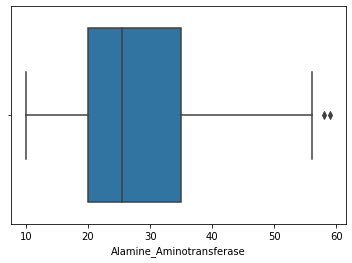

In [234]:
sns.boxplot(df['Alamine_Aminotransferase'])

In [235]:
df.shape

(270, 11)

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

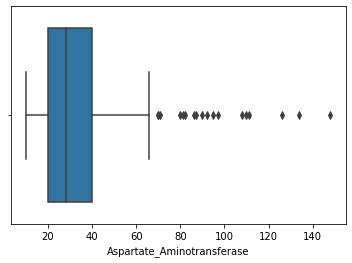

In [236]:
sns.boxplot(df['Aspartate_Aminotransferase'])

In [237]:
for i in range(1,2):
    q1=df.Aspartate_Aminotransferase.quantile(0.25)
    q3=df.Aspartate_Aminotransferase.quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df=df[df['Aspartate_Aminotransferase']<upper]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

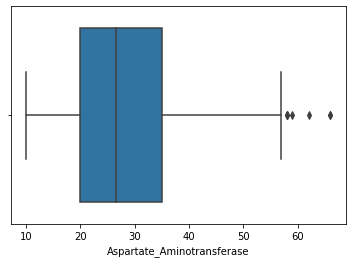

In [238]:
sns.boxplot(df['Aspartate_Aminotransferase'])

In [239]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(252, 11)

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

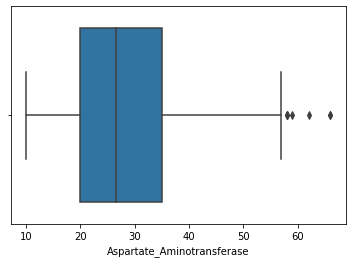

In [240]:
sns.boxplot(df['Aspartate_Aminotransferase'])

In [241]:
df.shape

(252, 11)

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Protiens'>

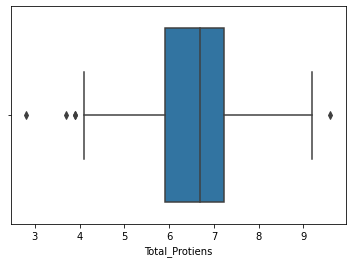

In [242]:
sns.boxplot(df['Total_Protiens'])

In [243]:
for i in range(1,8):
    
    Total_Protiens_z=stats.zscore(df['Total_Protiens'])
    df=df[np.abs(Total_Protiens_z)<=3]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Protiens'>

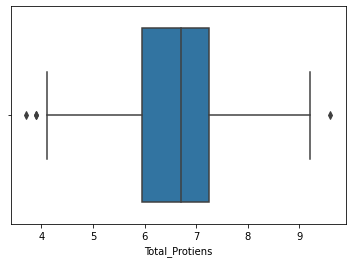

In [244]:
sns.boxplot(df['Total_Protiens'])

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin'>

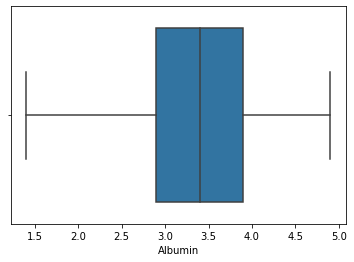

In [245]:
sns.boxplot(df['Albumin'])

In [246]:
#no outliers proceed

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

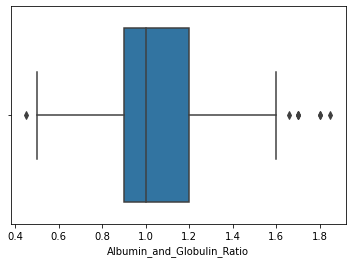

In [247]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])

In [248]:
for i in range(1,50):
    
    Albumin_and_Globulin_Ratio_z=stats.zscore(df['Albumin_and_Globulin_Ratio'])
    df=df[np.abs(Albumin_and_Globulin_Ratio_z)<=3]

C:\Users\shobanraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

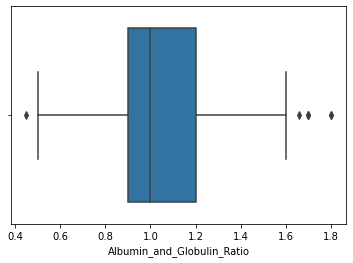

In [249]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

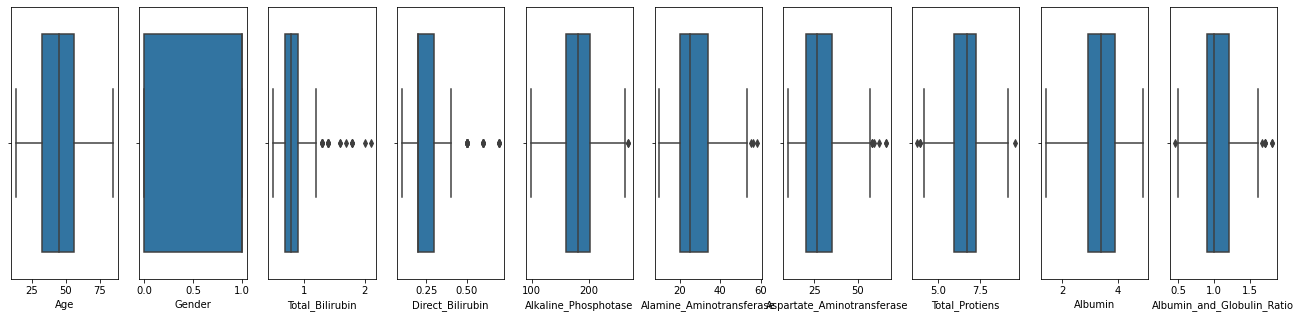

In [250]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 11, 1)
sns.boxplot(x=df['Age'])

plt.subplot(1, 11, 2)
sns.boxplot(x=df['Gender'])

plt.subplot(1, 11, 3)
sns.boxplot(x=df['Total_Bilirubin'])

plt.subplot(1, 11, 4)
sns.boxplot(x=df['Direct_Bilirubin'])

plt.subplot(1, 11, 5)
sns.boxplot(x=df['Alkaline_Phosphotase'])

plt.subplot(1, 11, 6)
sns.boxplot(x=df['Alamine_Aminotransferase'])

plt.subplot(1, 11, 7)
sns.boxplot(x=df['Aspartate_Aminotransferase'])

plt.subplot(1, 11, 8)
sns.boxplot(x=df['Total_Protiens'])

plt.subplot(1, 11, 9)
sns.boxplot(x=df['Albumin'])

plt.subplot(1, 11, 10)
sns.boxplot(x=df['Albumin_and_Globulin_Ratio'])

(array([ 7., 26., 27., 39., 82., 26., 16., 16.,  6.,  5.]),
 array([0.45 , 0.585, 0.72 , 0.855, 0.99 , 1.125, 1.26 , 1.395, 1.53 ,
        1.665, 1.8  ]),
 <BarContainer object of 10 artists>)

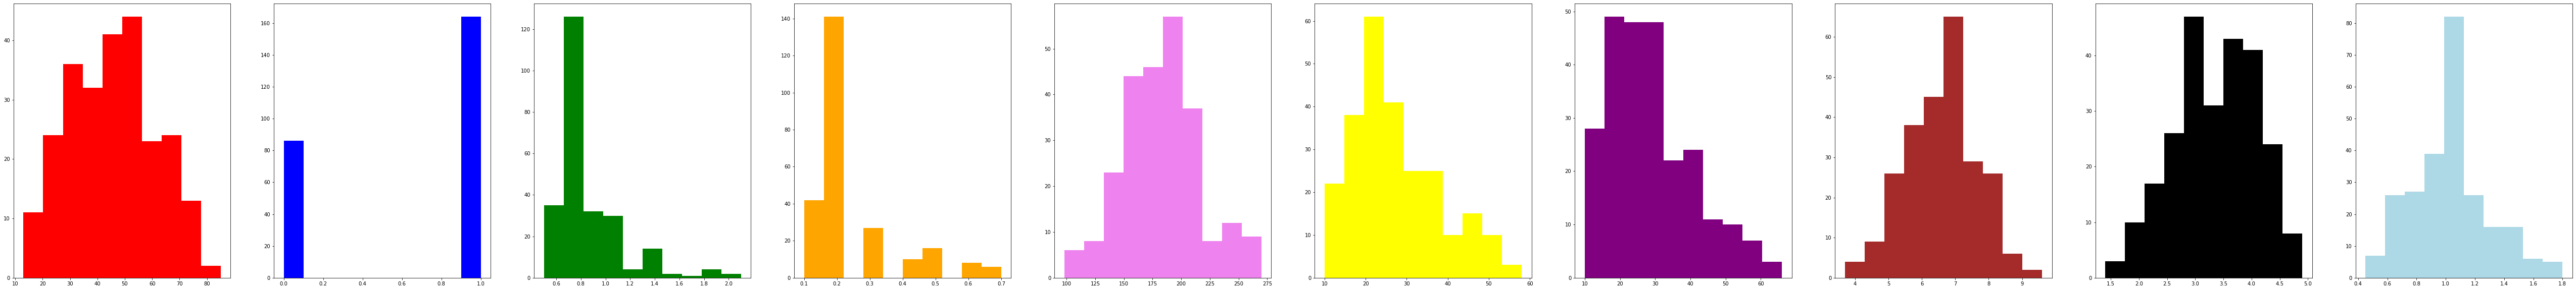

In [251]:
fig,ax=plt.subplots(figsize=(100,10))

plt.subplot(1, 11, 1)
plt.hist(x=df['Age'],color = "red")

plt.subplot(1, 11, 2)
plt.hist(x=df['Gender'],color = "blue")

plt.subplot(1, 11, 3)
plt.hist(x=df['Total_Bilirubin'],color = "green")

plt.subplot(1, 11, 4)
plt.hist(x=df['Direct_Bilirubin'],color = "orange")

plt.subplot(1, 11, 5)
plt.hist(x=df['Alkaline_Phosphotase'],color = "violet")

plt.subplot(1, 11, 6)
plt.hist(x=df['Alamine_Aminotransferase'],color = "yellow")

plt.subplot(1, 11, 7)
plt.hist(x=df['Aspartate_Aminotransferase'],color = "purple")

plt.subplot(1, 11, 8)
plt.hist(x=df['Total_Protiens'],color = "brown")

plt.subplot(1, 11, 9)
plt.hist(x=df['Albumin'],color = "black")

plt.subplot(1, 11, 10)
plt.hist(x=df['Albumin_and_Globulin_Ratio'],color = "lightblue")

In [268]:
df.shape

(250, 11)

# Split the data into dependent and independent variables.

In [252]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.0,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.1,1


In [253]:
X=df.iloc[:,:-1]

In [254]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.0
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.1


In [255]:
y=df.Dataset

In [256]:
y.head()

0    1
3    1
5    1
6    1
7    1
Name: Dataset, dtype: int64

# Scaling

In [257]:
from sklearn.preprocessing import MinMaxScaler

In [258]:
scale=MinMaxScaler()

In [259]:
x_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [260]:
x_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.722222,0.0,0.1250,0.000000,0.517442,0.125000,0.142857,0.525424,0.542857,0.333333
1,0.625000,1.0,0.3125,0.500000,0.488372,0.083333,0.178571,0.525424,0.571429,0.407407
2,0.458333,1.0,0.8125,1.000000,0.639535,0.187500,0.071429,0.661017,0.857143,0.629630
3,0.180556,0.0,0.2500,0.166667,0.325581,0.125000,0.035714,0.559322,0.600000,0.407407
4,0.222222,0.0,0.2500,0.333333,0.604651,0.083333,0.017857,0.508475,0.628571,0.481481


# Split the data into training and testing

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [263]:
x_train.shape

(175, 10)

In [264]:
x_test.shape

(75, 10)

In [265]:
y_train.shape

(175,)

In [266]:
y_test.shape

(75,)

In [267]:
df.shape

(250, 11)